In [2]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 데이터셋 불러오기
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)  # 특징 데이터
y = pd.Series(california.target)  # 타겟 데이터 (주택 가격)

# 학습용 데이터와 테스트용 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# 결과 출력
print("모델의 회귀 계수:")
print(pd.Series(model.coef_, index=X.columns))  # 각 특성의 회귀 계수

print("\n절편(Intercept):", model.intercept_)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n평균 제곱 오차 (MSE):", mse)
print("결정 계수 (R^2):", r2)

모델의 회귀 계수:
MedInc        0.448675
HouseAge      0.009724
AveRooms     -0.123323
AveBedrms     0.783145
Population   -0.000002
AveOccup     -0.003526
Latitude     -0.419792
Longitude    -0.433708
dtype: float64

절편(Intercept): -37.02327770606409

평균 제곱 오차 (MSE): 0.5558915986952444
결정 계수 (R^2): 0.5757877060324508


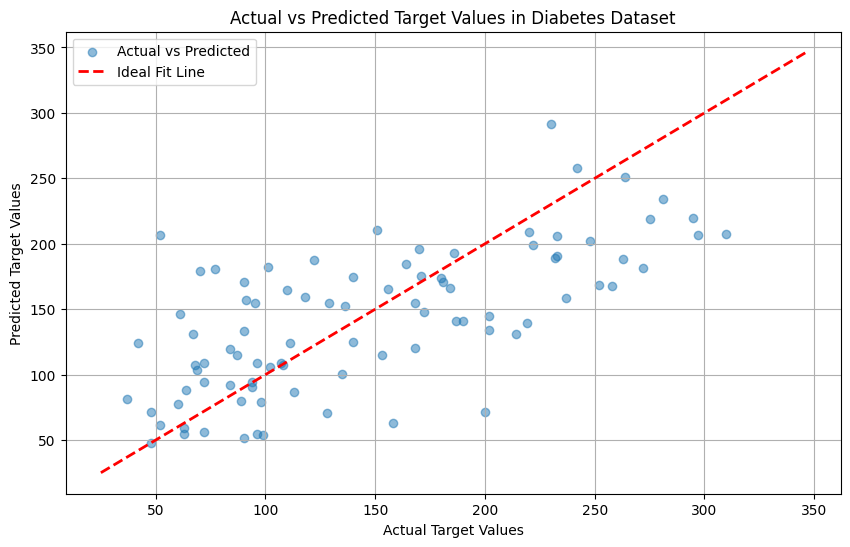

In [3]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 데이터셋 불러오기
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)  # 특징 데이터
y = pd.Series(diabetes.target)  # 타겟 데이터

# 학습용 데이터와 테스트용 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# 산점도와 예측 선 그래프
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label="Ideal Fit Line")
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Actual vs Predicted Target Values in Diabetes Dataset")
plt.legend()
plt.grid(True)
plt.show()